# Final exercise notes

Overall task of final exercise:
Implement an MNIST neural network that achieves at least 85% accuracy on the test set

Before any training can start, you should identify the corruption that we have applied to the MNIST dataset to create the corrupted version. 

In [10]:
import numpy as np 
import torch
import os
import matplotlib.pyplot as plt

## Original data

tensor(-1.) tensor(1.)


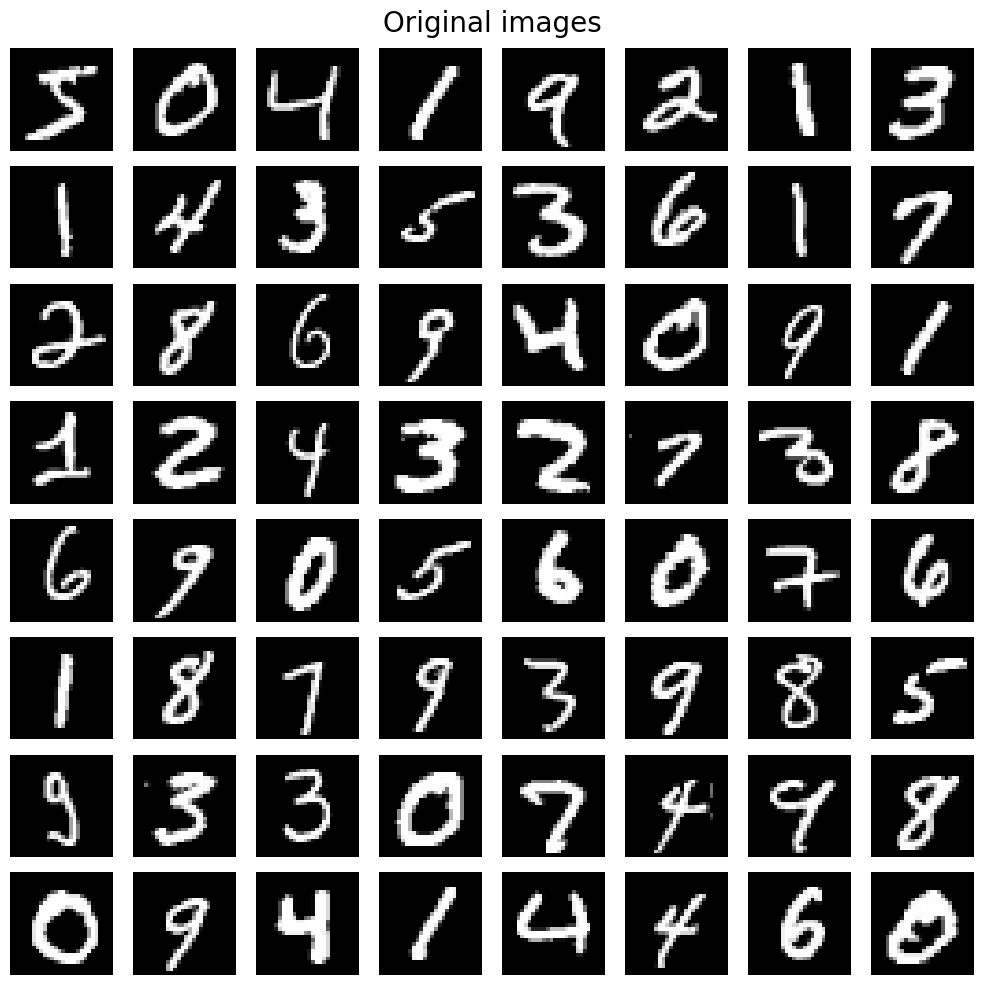

In [11]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=False) # 64 

dataiter = iter(trainloader)
orig_images, labels = next(dataiter)

print(orig_images.min(), orig_images.max())

fig, axes = plt.subplots(8, 8, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(orig_images[i].numpy().squeeze(), cmap='Greys_r')
    ax.axis('off')

fig.suptitle('Original images', fontsize=20)
plt.tight_layout()
plt.show()


## Corrupted data

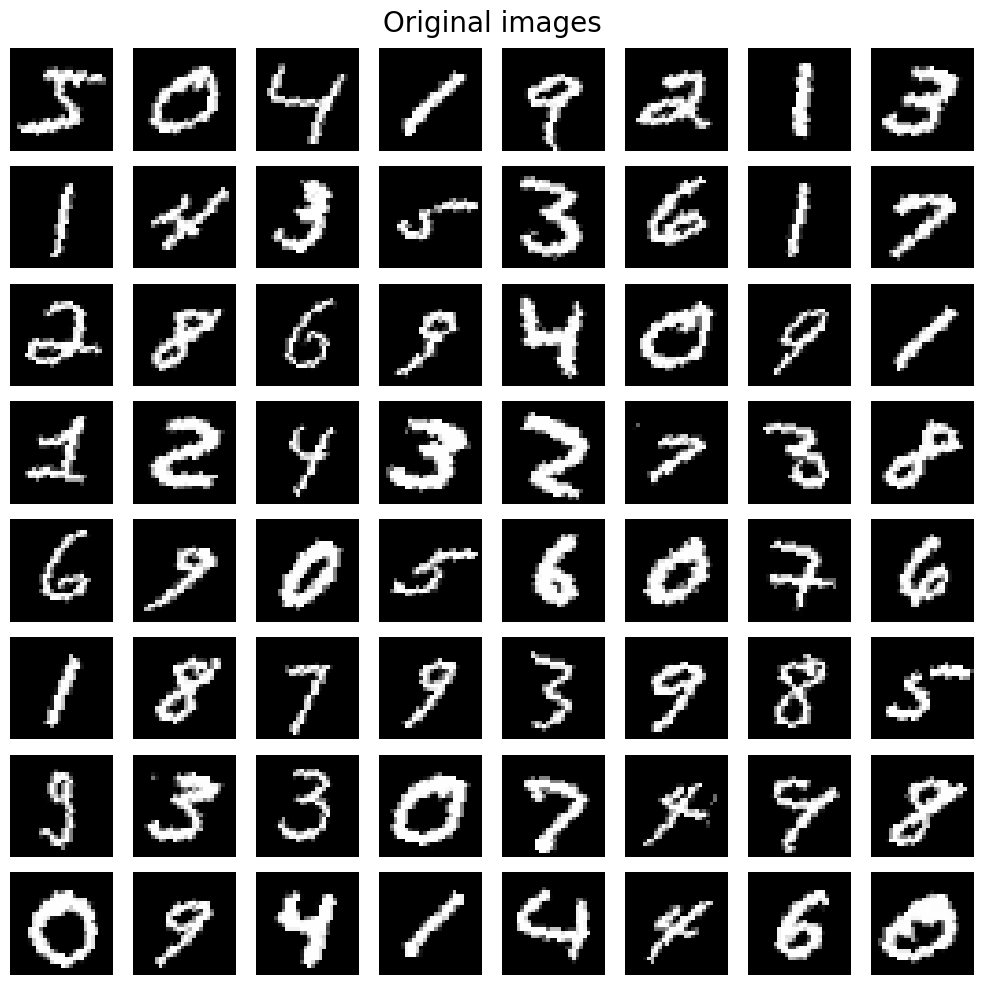

In [12]:
main_path = '/Users/Nina/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DTU_MLOPS'
data_path = os.path.join(main_path, 'data','corruptmnist')
# Load the file
corrupt_images = torch.load(os.path.join(data_path, 'train_images_0.pt'))

#features = torch.flatten(corrupt_images,start_dim=1) # same as train_images.view(images.shape[0], -1)

# checking numerical range
corrupt_images.min(), corrupt_images.max()
# data has not be standardized to -1 to 1 as the original MNIST data
transform = transforms.Normalize((0.5,), (0.5,))

fig, axes = plt.subplots(8, 8, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    trans_im = transform(corrupt_images[i].unsqueeze(0))
    ax.imshow(trans_im.numpy().squeeze(), cmap='Greys_r')
    ax.axis('off')

fig.suptitle('Original images', fontsize=20)
plt.tight_layout()
plt.show()


It appears like the corruption is a rotation and erosion of the original image (thinner numbers). A pixel-difference between the original and corrupted image will highligt the outline of the number.

A good approach to solve this task is to use a convolutional neural network (CNN) to learn the features of the images. CNNs are good at learning spatial features in images, which is what we need to do here.

## Pixel-difference between original and corrupted data

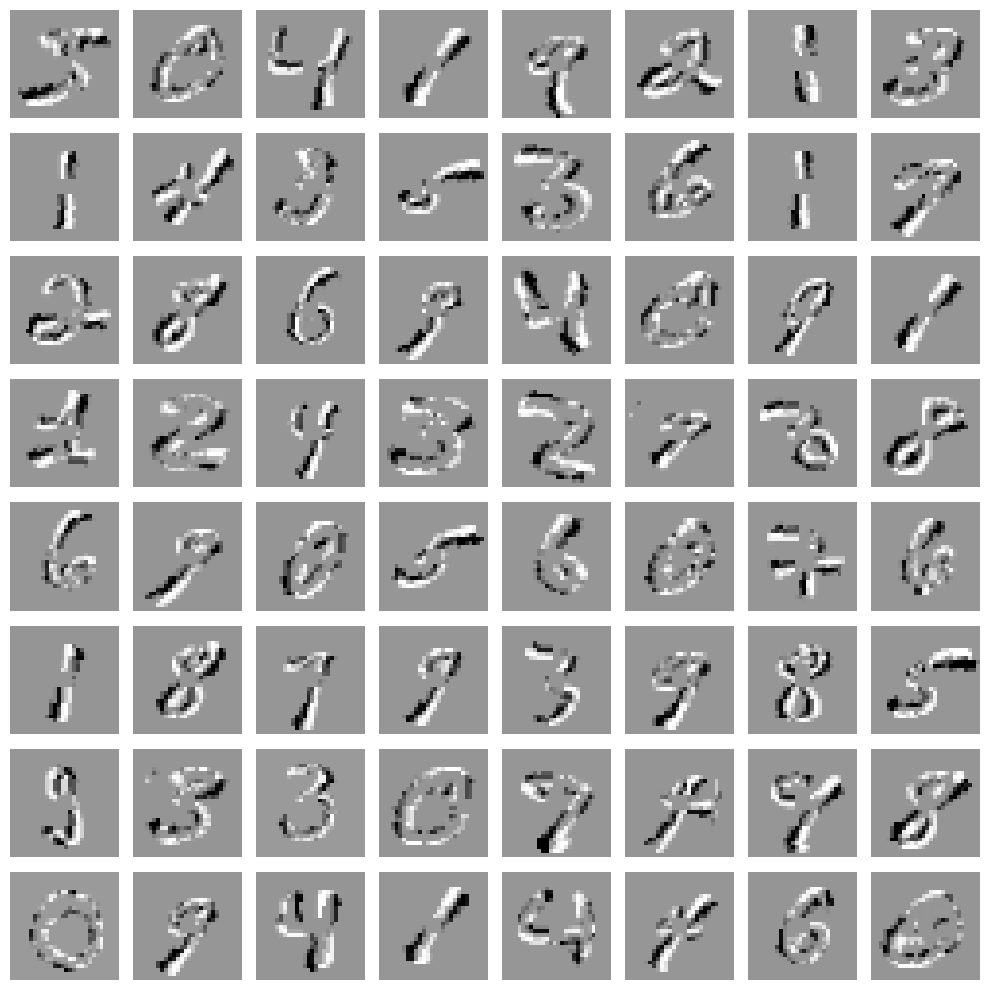

In [5]:
# visualizing corruption
fig, axes = plt.subplots(8, 8, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    trans_im = transform(corrupt_images[i].unsqueeze(0))
    diff_im = orig_images[i] - trans_im
    ax.imshow(diff_im.numpy().squeeze(), cmap='Greys_r')
    ax.axis('off')

plt.tight_layout()
plt.show()

As expected these difference images shows the outline of the numbers.

## Model architecture

In [2]:
from model import MyAwesomeModel
import torch

model = MyAwesomeModel()
sample_image = torch.randn(1, 1, 28, 28)  # Assuming the input image has 1 channel
output = model(sample_image)
print(output.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 3, 24, 24])
torch.Size([1, 6, 20, 20])
torch.Size([1, 2400])
torch.Size([1, 10])
